# Supervised Learning Final Project: Parkinson Predictor

We are going to build a model to predict the healthy status of a person regarding to Parkinson's disease. the main objective of the project is using a supervised learning model to predict the if a voice record belong to a person that has or not Parkinson's dosease (PD). The methodology that we are going to follow is. First, do an exploratory data analysis to clean the dataset. Second; build models. third, find the hyperparameters for tuning each model. And finally, conclude which model have the best fit in the issue.


In [ ]:
pip install numpy
pip install pandas
pip install scikit-learn
pip install matplotlib
pip install seaborn

In [1]:
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.svm import SVC

### Data
the data was get from UC Irvine Machine Learning Repository [Parkinsons](https://archive.ics.uci.edu/dataset/174/parkinsons) [1].
The dataset contains 192 voices records of 31 people with 22 features each. The column name is the individual identifier, the status column is 0 for healthy and 1 for PD.

[1] Little, M. A., McSharry, P. E., Hunter, E. J., & Ramig, L. O. (2008). Suitability of dysphonia measurements for telemonitoring of Parkinson's disease. IEEE Transactions on Biomedical Engineering, 56(4), 1015–1022. https://doi.org/10.1109/TBME.2008.2005954

In [2]:
data = pd.read_csv("./data/parkinsons.data")

### Exploratory data Analisis

#### Describe data

In [3]:
print(data.head())
print(data.info())
data.describe()

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


#### Identify X and Y
The model objective is predict if a voice record belong to a person that has PD. Fot that reason our model has to predict the status column. For the model building the name column is not needed.

In [4]:
y = data["status"]
x = data.drop(["status", "name"], axis=1)

#### Find feature correlation
In this step we are going to identity which element of the voice recording are highly correlated in order to remove this variables.

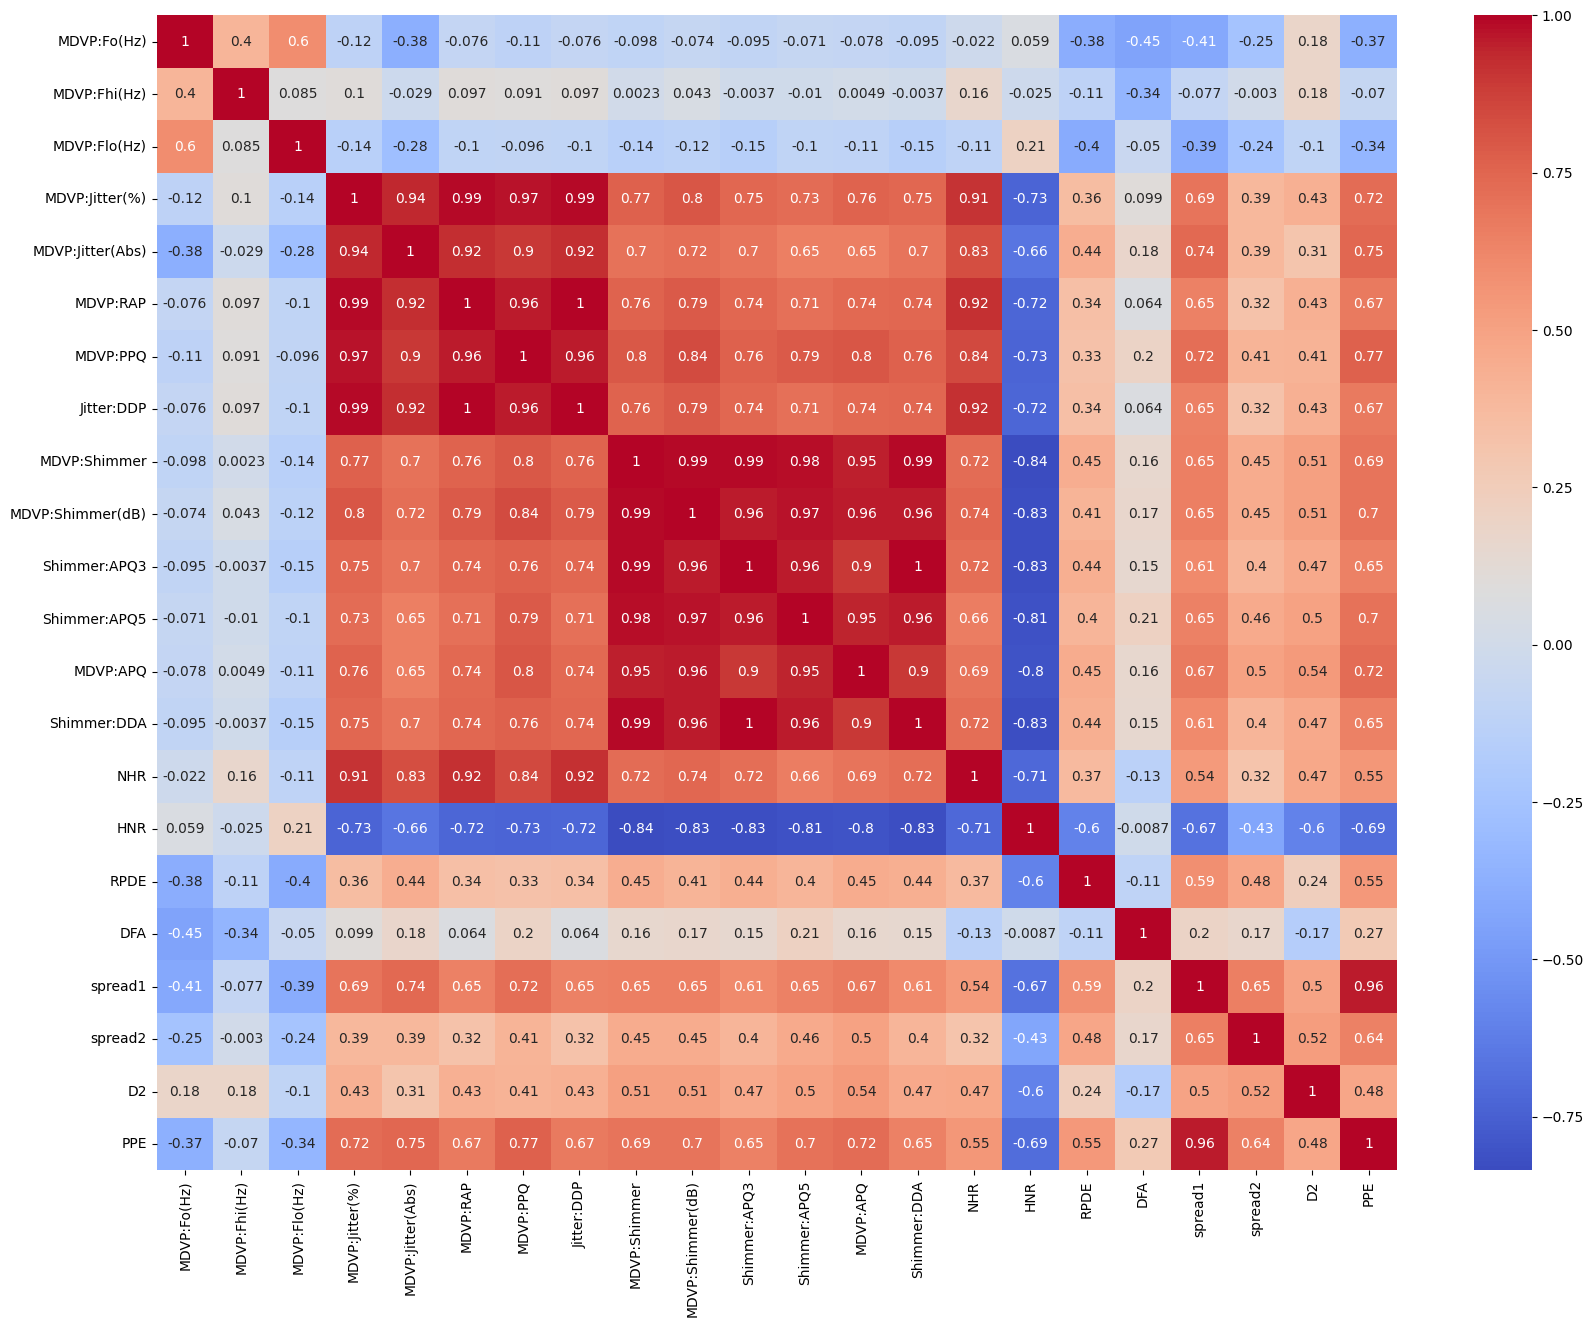

In [5]:
correlation_matrix = x.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

In [6]:
x = x.drop(["MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", 
                  "MDVP:Shimmer(dB)", "Shimmer:APQ3", 
                  "Shimmer:APQ5", "MDVP:PPQ", 
                  "Shimmer:DDA", "PPE" ], axis=1)

print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:Shimmer      195 non-null    float64
 6   MDVP:APQ          195 non-null    float64
 7   NHR               195 non-null    float64
 8   HNR               195 non-null    float64
 9   RPDE              195 non-null    float64
 10  DFA               195 non-null    float64
 11  spread1           195 non-null    float64
 12  spread2           195 non-null    float64
 13  D2                195 non-null    float64
dtypes: float64(14)
memory usage: 21.5 KB
None


#### Split train and test dataset
In order to doing cross-validation the data is divided in 2 groups (Train and Test).

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state=5)

### Build and Fit Models

In this section I am going to fit 3 classification models, Logistic regression, Random Forest and Supervised vector machine (SVN). For each model I am going to start using a basic hyperparameter and after that we are going to use GridSearchCV to find the parameters that improve the model accuracy.

#### Logistic Regression Model

In [8]:
LogReg = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [9]:
y_pred = LogReg.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Accuracy : %0.2f' % acc)

Accuracy : 0.90


#### Tuning Logistic Regression Model

In [30]:
param_grid = [    
    {
        'solver' : ['liblinear', 'newton-cg'],
        'C': [i*0.1 for i in range(1, 21)]
    }
]

LogRegSearch = GridSearchCV(LogisticRegression(), param_grid = param_grid)

logRegclf = LogRegSearch.fit(x_train, y_train)

In [31]:
best_logRegclf = logRegclf.best_estimator_

print(best_logRegclf)
y_pred = best_logRegclf.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Train Accuracy : %0.2f' % acc)

y_pred = best_logRegclf.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy : %0.2f' % test_acc)

pre = precision_score(y_test, y_pred)
print('Test Precision : %0.2f' % pre)

rec = recall_score(y_test, y_pred)
print('Test Recall : %0.2f' % rec)


LogisticRegression(C=0.6000000000000001, solver='liblinear')
Train Accuracy : 0.90
Test Accuracy : 0.86
Test Precision : 0.84
Test Recall : 1.00


#### Random Forest Model

In [32]:
rfCls = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=1).fit(x_train, y_train)

In [33]:
y_pred = rfCls.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Train Accuracy : %0.2f' % acc)

Train Accuracy : 0.88


#### Tuning Random Forest Model

In [38]:
param_grid = [    
    {
        'criterion': ['gini'],
        'max_depth': [10 * i for i in range(2,7)],
        'max_features': [2, 3],
        'min_samples_leaf': [3],
        'n_estimators': [100 * i for i in range(7,12)]
    }
]

randomForestSearch = GridSearchCV(RandomForestClassifier(), param_grid = param_grid).fit(x_train, y_train)


In [39]:
best_rfCls = randomForestSearch.best_estimator_

print(best_rfCls)
y_pred = best_rfCls.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Train Accuracy : %0.2f' % acc)

y_pred = best_rfCls.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy : %0.2f' % test_acc)

pre = precision_score(y_test, y_pred)
print('Test Precision : %0.2f' % pre)

rec = recall_score(y_test, y_pred)
print('Test Recall : %0.2f' % rec)

RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=3,
                       n_estimators=700)
Train Accuracy : 0.98
Test Accuracy : 0.90
Test Precision : 0.88
Test Recall : 1.00


#### SVM Model

In [40]:
svmCls = SVC(kernel='linear', C=1, gamma=1).fit(x, y)

In [41]:
y_pred = svmCls.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Train Accuracy : %0.2f' % acc)

Train Accuracy : 0.89


#### Tuning SVM Model

In [42]:
search_range = [i*0.1 for i in range(1, 21)]

param_grid = [    
    {
        'kernel': [ 'linear','rbf', 'sigmoid'],
        'C': search_range, 
        'gamma': search_range
    }
]


svmSearch = GridSearchCV(SVC(), param_grid = param_grid).fit(x_train, y_train)

In [43]:
best_svmCls = svmSearch.best_estimator_

print(best_svmCls)
y_pred = best_svmCls.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print('Train Accuracy : %0.2f' % acc)

y_pred = best_svmCls.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy : %0.2f' % test_acc)

pre = precision_score(y_test, y_pred)
print('Test Precision : %0.2f' % pre)

rec = recall_score(y_test, y_pred)
print('Test Recall : %0.2f' % rec)

SVC(C=1.3, gamma=0.1, kernel='linear')
Train Accuracy : 0.90
Test Accuracy : 0.82
Test Precision : 0.83
Test Recall : 0.94


### Conclutions

1. **Logitic Regression** With parameters of C= 0.60 and solver= 'liblinear' achieved an accuracy score at 0.86, precision at 0.84 and recall at 1.00 in the coss-validation set. 

2. **Random Forest** With parameters max_depth=20, max_features=3, min_samples_leaf=3 and n_estimatos=700 the accuracy score 0.08, precision 0.88 and recall 1.00 in the coss-validation set. 

3. **SVM (Suport Vector Machine** With parameters C=1.3, gamma=0.1 and kernel='linear' the accuracy score was 0.82, precision 0.83 and recall 0.94 in the coss-validation set.

Based on the resuls got in the models, we can conclude that:

Random Forest algorithm get the best performance with all the metrics ussing the cross-validation analisis, making the most ajusted model for this problem. However, the perfomance difference with Logistic Regration and SVM is not dramatic providing a good fit too. 
